In [14]:
!pip install smolagents python-dotenv sqlalchemy --upgrade -q
!pip install gradio_client -q

In [15]:
import os
from smolagents import Tool

In [16]:
from google.colab import userdata
hf_token = userdata.get("HF_TOKEN")

In [17]:
image_generation_tool = Tool.from_space(
    "black-forest-labs/FLUX.1-schnell",
    name="image_generator",
    description="Generate an image from a prompt"
)

x = image_generation_tool("A sunny beach")

Loaded as API: https://black-forest-labs-flux-1-schnell.hf.space ✔


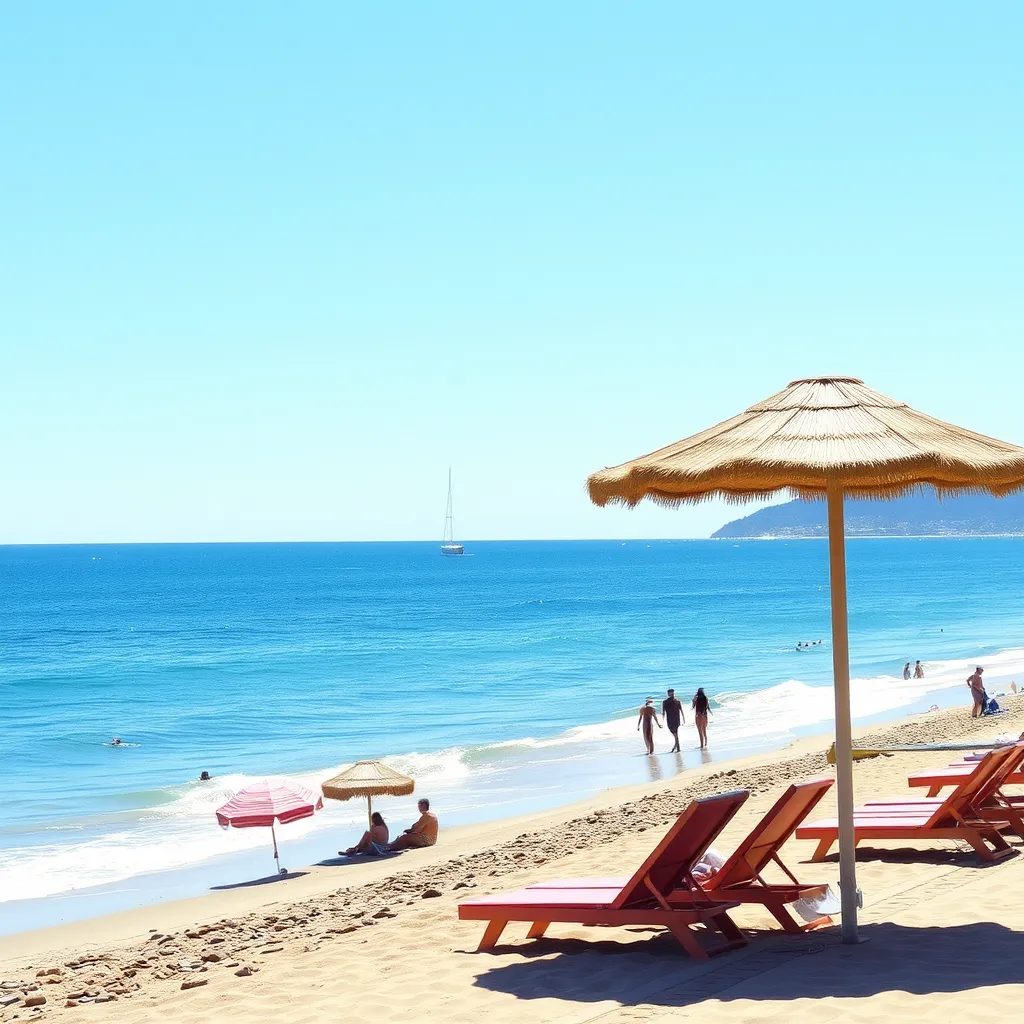

In [18]:
from urllib.request import urlretrieve

from PIL import Image

background = Image.open(x)
background

In [19]:
from smolagents import CodeAgent, HfApiModel

model = HfApiModel("Qwen/Qwen2.5-Coder-32B-Instruct", token=hf_token)
agent = CodeAgent(tools=[image_generation_tool], model=model)

ff = agent.run(
    " 'Improve this prompt, then generate an image of it.', prompt='A rabbit wearing a space suit' "
)
ff

╭──────────────────────────────────────────────────── New run ────────────────────────────────────────────────────╮
│                                                                                                                 │
│ 'Improve this prompt, then generate an image of it.', prompt='A rabbit wearing a space suit'                    │
│                                                                                                                 │
╰─ HfApiModel - Qwen/Qwen2.5-Coder-32B-Instruct ──────────────────────────────────────────────────────────────────╯

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ Step 1 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

─ Executing parsed code: ──────────────────────────────────────────────────────────────────────────────────────── 
  improved_prompt = "A curious white rabbit wearing a sleek, futuristic red and silver space suit, complete with   
  a visor, air hose, and safety tank, standing on the surface of the moon with a small American flag in the        
  background and a panoramic view of the lunar landscape."                                                         
  print(improved_prompt)                                                                                           
 ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────

Execution logs:
A curious white rabbit wearing a sleek, futuristic red and silver space suit, complete with a visor, air hose, and 
safety tank, standing on the surface of the moon with a small American flag in the background and a panoramic view 
of the lunar landscape.

Out: None

[Step 1: Duration 0.18 seconds| Input tokens: 2,037 | Output tokens: 118]

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ Step 2 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

─ Executing parsed code: ──────────────────────────────────────────────────────────────────────────────────────── 
  image = image_generator(prompt=improved_prompt)                                                                  
  final_answer(image)                                                                                              
 ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────

Out - Final answer: /tmp/gradio/6eb6b1e6fd34c6483dcdbad30e68c601473d5045532f3afd0292765920e37f0a/image.webp

[Step 2: Duration 3.07 seconds| Input tokens: 4,365 | Output tokens: 169]

'/tmp/gradio/6eb6b1e6fd34c6483dcdbad30e68c601473d5045532f3afd0292765920e37f0a/image.webp'

In [20]:
ff

'/tmp/gradio/6eb6b1e6fd34c6483dcdbad30e68c601473d5045532f3afd0292765920e37f0a/image.webp'

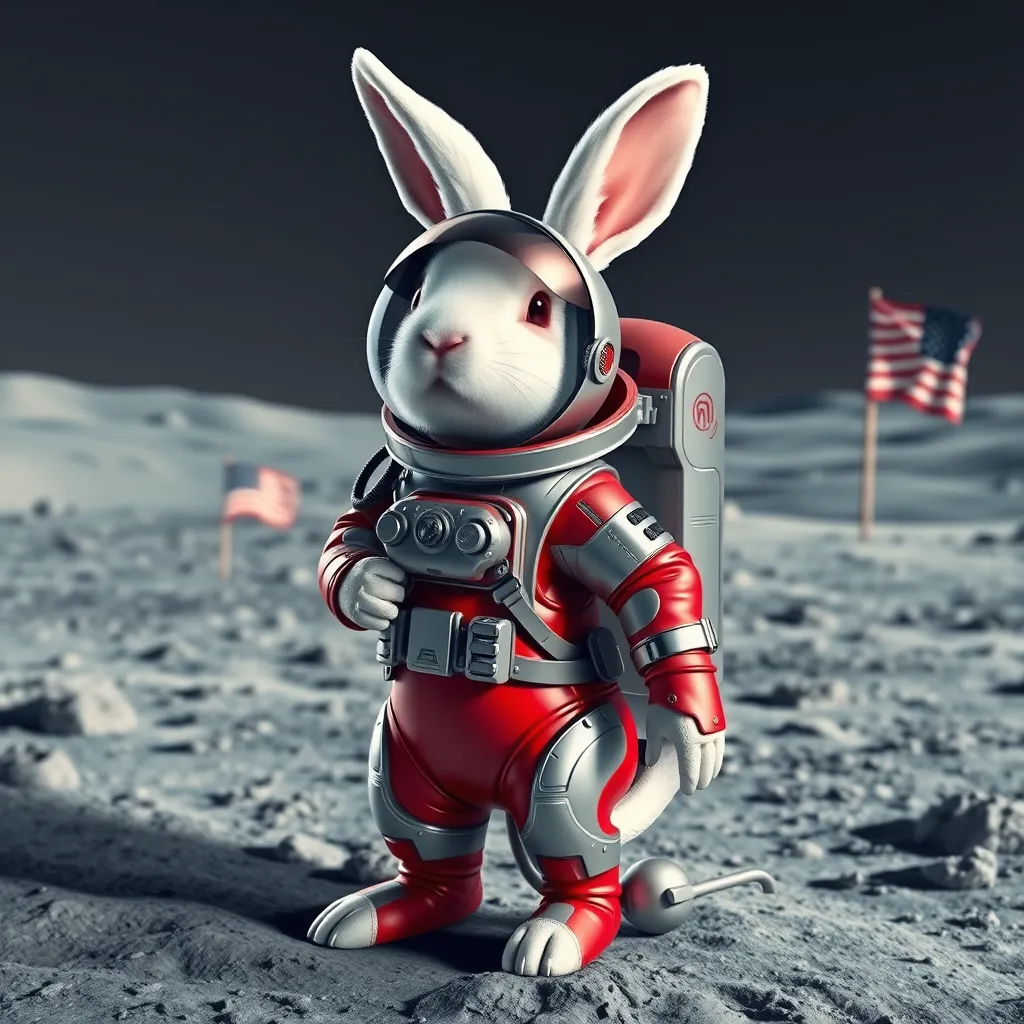

In [21]:
from urllib.request import urlretrieve

from PIL import Image

background = Image.open(ff)
background